# Project 1 - Finding Lane Lines on the Road
### Neil Hiddink, 10/31/2016

# PART 1 - Test on Images

In [1]:
#Import statements and inline output set-up:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os

In [2]:
#Display list of test images for reference:
images = os.listdir("test_images/")
images

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

In [3]:
#Function to run math functions/algorithms in one place. See last code cell in project for details.
def main(img):
    
    #Read the image passed to main:
    image = mpimg.imread(img)
    
    #Convert to grayscale, perform gaussian blur and canny edge detection:
    gray = grayscale(image)
    gauss = gaussian_blur(gray, 5)
    can = canny(gauss, 50, 150)
    
    #Create a region of interest mask to eliminate extraneous edges:
    shape = image.shape
    vertices = np.array([[(0,shape[0]),(410, 340),(480, 310), (shape[1],shape[0])]], dtype=np.int32)
    region = region_of_interest(can, vertices)
    
    #Perform a Hough transform and draw lines onto original image. See draw_lines function below for details.
    rho = 2
    theta = 1/180
    threshold = 50
    min_line_length = 10
    max_line_gap = 20
    hough = hough_lines(region, rho, theta, threshold, min_line_length, max_line_gap)
    vertices2 = np.array([[(0,shape[0]),(410, 340),(480, 310), (shape[1],shape[0])]], dtype=np.int32)
    
    #Create a second region mask to crop extrapolating lines and format line weight:
    region2 = region_of_interest(hough, vertices2)
    weight = weighted_img(region2, image, α=0.8, β=1., λ=0.)
    
    #Display plot:
    plt.imshow(weight);

Image: solidWhiteCurve.jpg


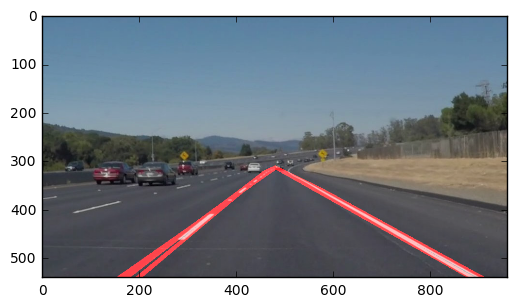

In [6]:
print('Image: ' + images[0])
main('test_images/' + images[0]);

Image: solidWhiteRight.jpg


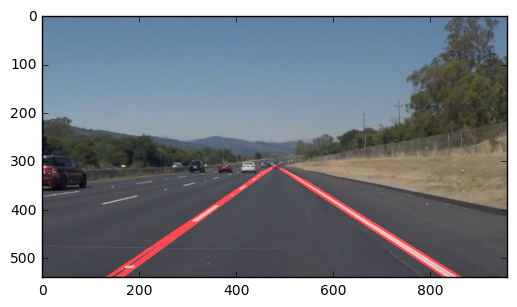

In [7]:
print('Image: ' + images[1])
main('test_images/' + images[1]);

Image: solidYellowCurve.jpg


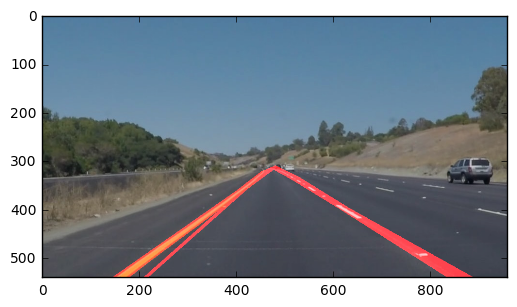

In [8]:
print('Image: ' + images[2])
main('test_images/' + images[2]);

Image: solidYellowCurve2.jpg


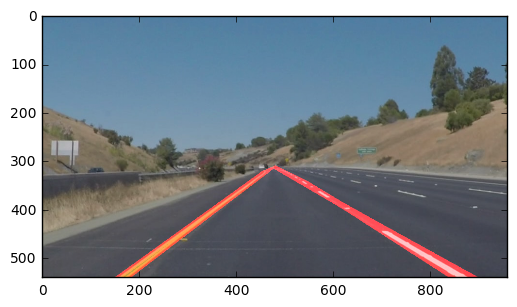

In [9]:
print('Image: ' + images[3])
main('test_images/' + images[3]);

Image: solidYellowLeft.jpg


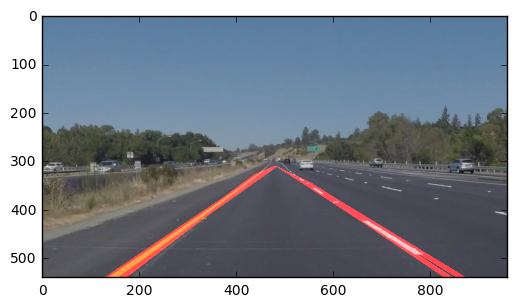

In [10]:
print('Image: ' + images[4])
main('test_images/' + images[4]);

Image: whiteCarLaneSwitch.jpg


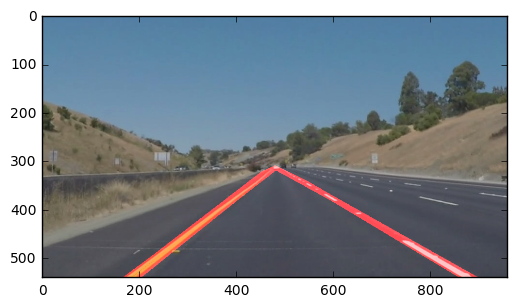

In [11]:
print('Image: ' + images[5])
main('test_images/' + images[5]);

# PART 2 - Test on Video

In [12]:
# Import everything needed to edit/save/watch video clips:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [13]:
def process_image(image):
    
    #Convert to grayscale, perform gaussian blur and canny edge detection:
    gray = grayscale(image)
    gauss = gaussian_blur(gray, 5)
    can = canny(gauss, 50, 150)
    
    #Create a region of interest mask to eliminate extraneous edges:
    shape = image.shape
    vertices = np.array([[(0,shape[0]),(410, 340),(480, 310), (shape[1],shape[0])]], dtype=np.int32)
    region = region_of_interest(can, vertices)
    
    #Perform a Hough transform and draw lines onto original image. See draw_lines function below for details.
    rho = 2
    theta = 1/180
    threshold = 50
    min_line_length = 10
    max_line_gap = 20
    hough = hough_lines(region, rho, theta, threshold, min_line_length, max_line_gap)
    vertices2 = np.array([[(0,shape[0]),(410, 340),(480, 310), (shape[1],shape[0])]], dtype=np.int32)
    
    #Create a second region mask to crop extrapolating lines and format line weight:
    region2 = region_of_interest(hough, vertices2)
    result = weighted_img(region2, image, α=0.8, β=1., λ=0.)
    
    return result

In [14]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:24<00:00,  9.43it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 17.9 s, sys: 6.73 s, total: 24.7 s
Wall time: 27.1 s


In [15]:
print('Video: White Output')
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

Video: White Output


In [16]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|█████████▉| 681/682 [01:32<00:00,  5.89it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 1min 5s, sys: 19.7 s, total: 1min 24s
Wall time: 1min 35s


In [28]:
print('Video: Yellow Output')
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

Video: Yellow Output


# PART 3 - Reflections 

# How could you imagine making your algorithm better / more robust? 
    Overall, I could have spend more time tweaking and optimizing the parameters for my Hough transforms and canny edge detections in this project. I stuck to values that were similar to the lessons for the most part, and fortunately the results were decent. If I were putting this code into a real-world self-driving car, I would want to go back to the parameters and continue to optimize their values so that the horizontal lines that flicker in my Yellow video would be handled better.
    
# Where will your current algorithm be likely to fail?
    Right now the current algorithm fails for changes in light intensity, as the code I have currently does not translate well to the challenge or any of my own sample footage. In addition, the line extrapolation is not robust; I need to develop my Python skills further in order to better incorporate OpenCV in my future projects.

# Please add your thoughts below, and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!
    This was a very eye-opening and exciting project! Although it was a lot of work to get up to speed on some of the material, I am confident in my understanding of the concepts presented in the lessons and I am now fairly comfortable with Python, OpenCV, and working in jupyter notebooks.

### Supporting Code

In [5]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    
    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            point = np.mean(line, axis=0)
            y = point[1]
            x = point[0]
            if slope < 0: 
                intercept = y - slope*x
                yLeft = intercept
                yRight = slope * 960 + intercept
                cv2.line(img, (0, int(yLeft)), (960, int(yRight)), color, thickness)
            if slope > 0:
                intercept = y - slope*x
                yLeft = intercept
                yRight = slope * 960 + intercept
                cv2.line(img, (0, int(yLeft)), (960, int(yRight)), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)